In [85]:
import pandas as pd

dataSet = pd.read_csv("C:\\Users\\sergi\\Documents\\dds_datasets\\dds_datasets\\dds_ch2_nyt\\nyt1.csv")
Age_Group = ["18-", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
dataSet

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [86]:
normalData = dataSet[(dataSet.Signed_In == 1) & (dataSet.Age > 0)]

def setAgeGroup(age):
    if age < 18:
        return "18-"
    elif age < 25:
        return "18-24"
    elif age < 35:
        return "25-34"
    elif age < 45:
        return "35-44"
    elif age < 55:
        return "45-54"
    elif age < 65:
        return "55-64"
    else:
        return "65+"

normalData["Age_Group"] = normalData.Age.apply(lambda x: setAgeGroup(x))
normalData

C:\Users\sergi\AppData\Local\Temp\ipykernel_14204\3757476715.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalData["Age_Group"] = normalData.Age.apply(lambda x: setAgeGroup(x))


,Age,Gender,Impressions,Clicks,Signed_In,Age_Group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [87]:
data_byAge = normalData.groupby("Age_Group", as_index=False).count()
data_byAge

,Age_Group,Age,Gender,Impressions,Clicks,Signed_In
0,18-,13828,13828,13828,13828,13828
1,18-24,40694,40694,40694,40694,40694
2,25-34,58174,58174,58174,58174,58174
3,35-44,70860,70860,70860,70860,70860
4,45-54,64288,64288,64288,64288,64288
5,55-64,44738,44738,44738,44738,44738
6,65+,28753,28753,28753,28753,28753


<AxesSubplot: xlabel='Age_Group', ylabel='Clicks'>

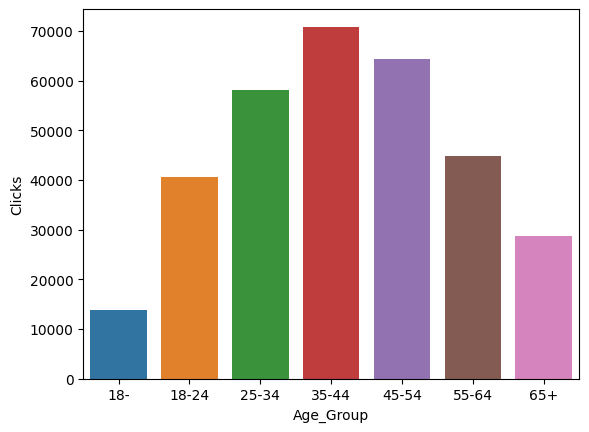

In [88]:
import seaborn as sb

sb.barplot(data = data_byAge, x = "Age_Group", y = "Clicks")

In [89]:
data_avg = data_byAge.drop(["Age", "Impressions", "Clicks", "Signed_In", "Gender"], axis=1)

average_stats = normalData.groupby(["Age_Group"], as_index=False).mean()

data_avg["Avg_Impression"] = average_stats["Impressions"]
data_avg["Avg_Clicks"] = average_stats["Clicks"]
data_avg["Avg_SignedIn"] = average_stats["Signed_In"]

data_avg


,Age_Group,Avg_Impression,Avg_Clicks,Avg_SignedIn
0,18-,5.007159,0.149335,1.0
1,18-24,5.002826,0.053251,1.0
2,25-34,4.993829,0.050486,1.0
3,35-44,5.021507,0.051679,1.0
4,45-54,5.010406,0.050274,1.0
5,55-64,5.022308,0.101837,1.0
6,65+,5.012347,0.151289,1.0


In [90]:
normalData["Impressions"].max()

20